# final.ipynb

## Purpose

This final will be split into two parts, a practical and a conceptual exam component.  The practical exam will be worth 50 points, and will primarily cover elements from Pandas on up.

## Data Set


## Required Turn-In

One notebook is required for this assignment.  Please note that the standard conventions described thus far in the course will continue to be graded against.  That being, 70% of this will be off correctness (and analysis), and the other 30% will be off naming, conventions, and expandability.

Please be prepared to spend some time proof reading your notebook.  Please do not use this notebook as a template, create your own in the end.  While there are some "step by step" parts listed in this notebook, it's designed to give you the steps necessary for analysis.  Your final result should be your own, and

In [53]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [36]:
rawRamenDataSet = pd.read_csv("https://raw.githubusercontent.com/TheDarkTrumpet/BAIS-6040-0EXP-Sum2021/master/data/ramen-biglist.csv")
rawRamenDataSet

,Review #,Brand,Variety,Style,Country,Stars,T
0,3702,Higashimaru,Seafood Sara Udon,Pack,Japan,5,NaN
1,3701,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,NaN
2,3700,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5,NaN
3,3699,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,NaN
4,3698,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,NaN
...,...,...,...,...,...,...,...
3697,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
3698,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
3699,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
3700,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


In [37]:
ramenDataSet = rawRamenDataSet[["Brand", "Variety", "Style", "Country", "Stars"]].copy()
ramenDataSet["Stars"] = pd.to_numeric(ramenDataSet["Stars"],errors='coerce')
ramenDataSet

,Brand,Variety,Style,Country,Stars
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5
...,...,...,...,...,...
3697,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5
3698,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0
3699,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0
3700,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0


In [38]:
ramenDataSet.dropna(inplace=True)
ramenDataSet.reset_index(drop=True, inplace=True)
ramenDataSet

,Brand,Variety,Style,Country,Stars
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5
...,...,...,...,...,...
3682,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5
3683,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0
3684,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0
3685,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0


In [39]:
ramenDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Brand    3687 non-null   object 
 1   Variety  3687 non-null   object 
 2   Style    3687 non-null   object 
 3   Country  3687 non-null   object 
 4   Stars    3687 non-null   float64
dtypes: float64(1), object(4)
memory usage: 144.1+ KB


In [41]:
ramenDataSet["Stars"].mean()

3.7232573908326554

In [42]:
ramenDataSet.groupby(["Brand", "Variety"])["Stars"].mean()

Brand              Variety                                                       
1 To 3 Noodles     Chatpat Masala                                                    4.00
7 Select           Nissin Instant Noodles Shrimp Ma Nao Lui Suan Flavour King Cup    3.75
                   Nissin Instant Noodles Tom Yum Seafood Creamy Flavour King Cup    3.50
7 Select/Nissin    Super Tom Yum Shrimp                                              3.50
7-Eleven / Nissin  Mouko Tanmen Nakamoto                                             4.25
                                                                                     ... 
iMee               Instant Noodles Vegetable Flavour                                 2.75
                   Instant Noodles chicken Flavour                                   3.50
iNoodle            Taiwan Style Chow Mein                                            2.25
                   Udon Noodle Soup Oriental                                         3.75
nunu              

In [46]:
ramenByCountry = ramenDataSet.groupby(["Country"])[["Stars"]].mean()

,Stars
Country,
Australia,3.260000
Bangladesh,3.479167
Brazil,3.645833
Cambodia,4.200000
Canada,2.330357
China,3.534898
Colombia,3.291667
Dubai,3.583333
Estonia,3.500000


In [54]:
ramenDataSet['Bin'] = ramenDataSet.apply(lambda row: math.floor(row['Stars']), axis=1)
ramenDataSet

,Brand,Variety,Style,Country,Stars,Bin
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,5
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,3
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,5
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,4
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,3
...,...,...,...,...,...,...
3682,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,3
3683,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,1
3684,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,2
3685,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,2


'Chart should appear below'

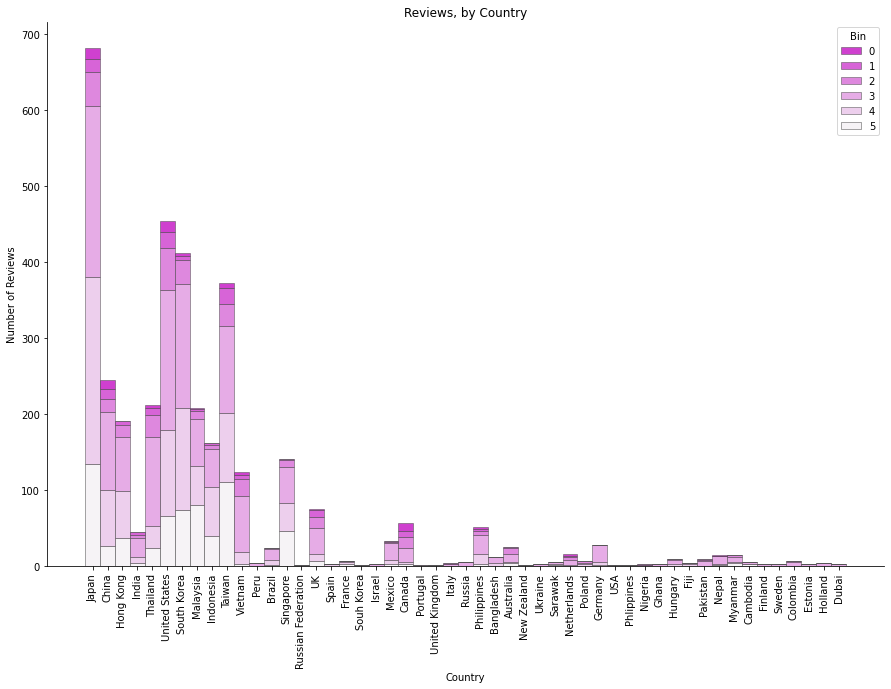

In [70]:
f, ax = plt.subplots(figsize=(15, 10))
f.patch.set_facecolor('white')
sns.despine(f)

sns.histplot(
    ramenDataSet,
    x = "Country", hue="Bin",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    #hue_order=[5, 4, 3, 2, 1, 0]
    #log_scale=True
)
plt.xticks(rotation=90)
plt.title('Reviews, by Country')
ax.set_ylabel('Number of Reviews')
"Chart should appear below"

In [77]:
len(ramenDataSet[ramenDataSet["Country"] == "Japan"])

681

In [89]:
ramenDataSet['CountryClassification'] = ramenDataSet.apply(
    lambda row: row["Country"] if len(ramenDataSet[ramenDataSet["Country"] == row["Country"]]) > 30 else "Other", axis=1)
ramenDataSet

,Brand,Variety,Style,Country,Stars,Bin,CountryClassification
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,5,Japan
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,3,China
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,5,Hong Kong
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,4,Hong Kong
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,3,Japan
...,...,...,...,...,...,...,...
3682,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,3,Vietnam
3683,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,1,Thailand
3684,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,2,Thailand
3685,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,2,Thailand


In [90]:
ramenDataSet[ramenDataSet["CountryClassification"] == "Other"]

,Brand,Variety,Style,Country,Stars,Bin,CountryClassification
141,Aji-no-men,Sabor Gallina Criolla,Pack,Peru,3.50,3,Other
155,Nissin,Miojo Lamen Sabor Galinha Caipira,Pack,Brazil,3.50,3,Other
164,Nissin-Miojo,Lamen Sabor Costela,Pack,Brazil,3.25,3,Other
184,Doshirak,Mild Flavor Chicken Ramen Noodle Soup,Pack,Russian Federation,3.25,3,Other
201,Yatekomo,Pollo Con Soja,Pack,Spain,3.50,3,Other
...,...,...,...,...,...,...,...
2945,Golden Mie,chicken,Pack,Dubai,3.25,3,Other
2967,Golden Mie,Chicken Curry,Pack,Dubai,3.75,3,Other
3143,Unox,Good Noodles Chicken,Pack,Holland,3.50,3,Other
3159,Unox,Good Noodles Vegetable,Pack,Holland,3.75,3,Other


'Chart should appear below'

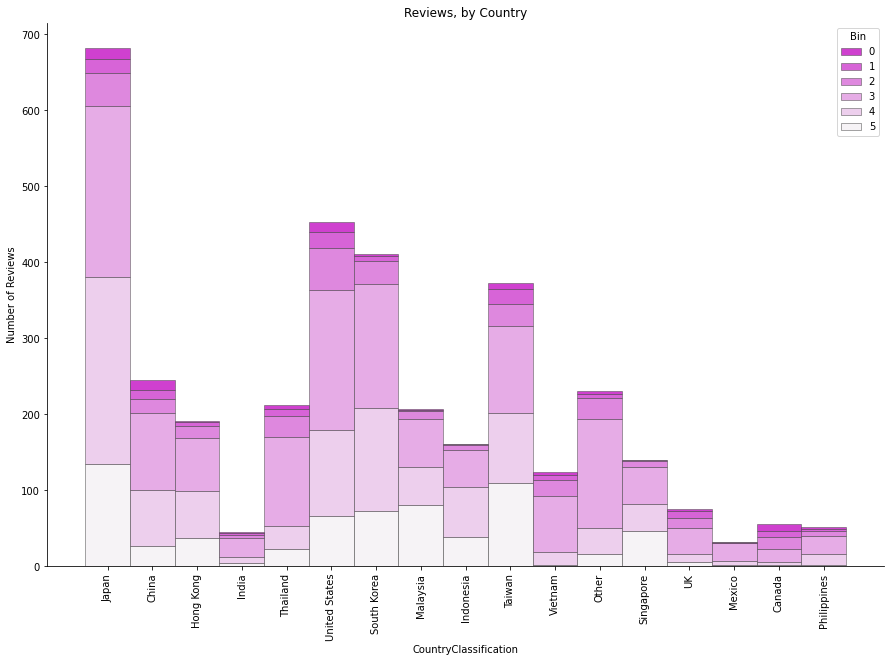

In [91]:
f, ax = plt.subplots(figsize=(15, 10))
f.patch.set_facecolor('white')
sns.despine(f)

sns.histplot(
    ramenDataSet,
    x = "CountryClassification", hue="Bin",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    #hue_order=[5, 4, 3, 2, 1, 0]
    #log_scale=True
)
plt.xticks(rotation=90)
plt.title('Reviews, by Country')
ax.set_ylabel('Number of Reviews')
"Chart should appear below"
